<hr style="border:2px solid black">

### Project Milestone 1


[**Course material 2.1**](https://spiced.space/naive-bayleaves/ds-course/chapters/project_titanic/ml_fundamentals/README.html)

Download the data and do the exploratory data analysis as described in Project Milestone 1.

**Note:** train.csv in 2.1 is actually your full data set for the week. You need to split it to **train and validation**.

In [1]:
# data analysis stack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import train-test-split
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# machine learning stack
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

### Get the data

In [2]:
full_data = pd.read_csv("data/titanic/train.csv")#working with this one only that is why full

test_for_kaggle = pd.read_csv("data/titanic/test.csv") #cannot touch only use when submitting to Kaggle

In [3]:
full_data.shape

(891, 12)

In [4]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory data analysis

Merge your X_train and y_train from the previous step into train_data

### **Trying out Logistic regression for combination of features**

**Step 1 Train-Validation split**

**map the sex to 0/1**
Female: 0
Male: 1

In [5]:
full_data['Sex_01'] = full_data['Sex'].map({'female':0, 'male':1}) #creating new column mapping the values 
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_01
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [6]:
#fill NAs for Age 

In [7]:
X = full_data.drop('Survived' ,axis= 1)
y = full_data['Survived']

In [8]:
Xtrain, Xval, ytrain, yval = \
train_test_split(X, y, test_size=0.2,random_state=101,stratify=y)#changes as per logistic regresion lesson

In [9]:
X.shape, y.shape

((891, 12), (891,))

In [10]:
Xtrain, Xval, ytrain, yval = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=101,
    stratify=y
)

In [11]:
df_train= Xtrain
df_train['Survived'] =ytrain # add new column with survived resutls as ytrain
df_train['Survived'] = ytrain


**STEP 2** Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [12]:
df_train.value_counts('Survived') # count all survivors

Survived
0    439
1    273
dtype: int64

<Axes: xlabel='Survived'>

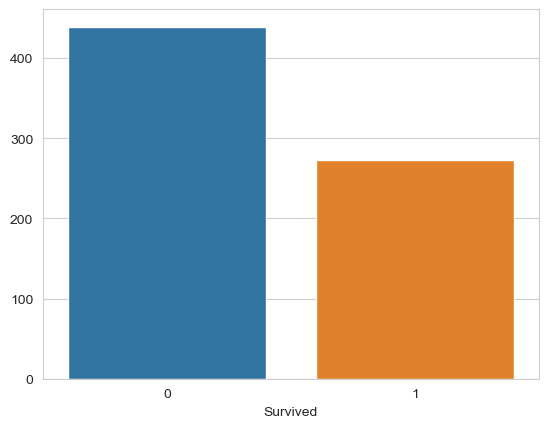

In [13]:
sns.barplot(data = df_train, x = 'Survived', y =df_train.value_counts('Survived'))

**STEP 3**
Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [14]:
df_train[df_train['Pclass'] == 1].value_counts('Survived',normalize=True)

Survived
1    0.62069
0    0.37931
dtype: float64

**STEP 4** Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.


<Axes: xlabel='Pclass'>

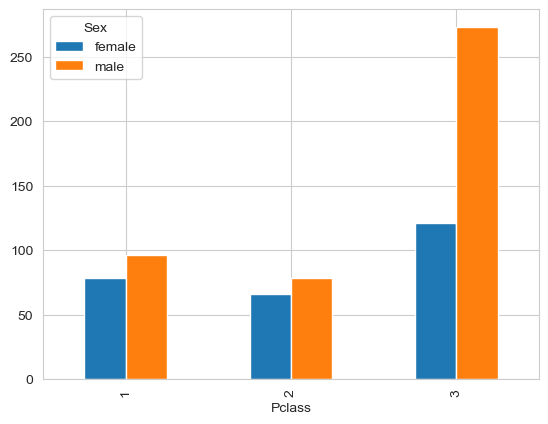

In [15]:
gender_vs_class = df_train.groupby(['Sex', 'Pclass']).size().reset_index(name='counts')
gender_vs_class.pivot(index='Pclass', columns='Sex', values='counts').plot.bar()

**STEP 5** Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

<Axes: xlabel='Age', ylabel='Count'>

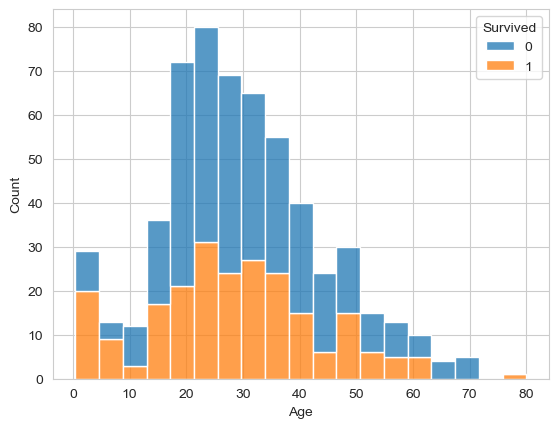

In [16]:
sns.histplot(data=df_train,
             x='Age',
             multiple='stack',
             hue = 'Survived'
            )


**STEP 6** Calculate the average age for survived and drowned passengers separately.


In [17]:
df_train.groupby('Survived')['Age'].mean()

Survived
0    30.536337
1    28.289301
Name: Age, dtype: float64

**Step 7** Replace missing age values by the mean age.

In [18]:
mean_age = df_train['Age'].mean()
df_train['Age'] = df_train['Age'].fillna(value = mean_age)

#check:
df_train['Age'].isna().sum()

0

**STEP 8**
Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.


In [19]:
pd.DataFrame(df_train.groupby(['Pclass']).value_counts(['Survived']))

0
Pclass Survived     
1      1         108
       0          66
2      0          74
       1          70
3      0         299
       1          95

**feature scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

# instantiate standard scaler - scales your values automatically! 
scaler = StandardScaler()

# fit and transform training data
Xtrain = scaler.fit_transform(Xtrain)

# transform test data
Xval = scaler.transform(Xval)

In [ ]:
Xtrain

In [ ]:
# instatiate the model
model = LogisticRegression()

In [ ]:
# train the model
model.fit(Xtrain, ytrain)

In [ ]:
# score on the training data
model.score(Xtrain, ytrain)

In [ ]:
model.score(Xval, yval)